In [20]:
import json
import pathlib
from typing import NewType

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.models import load_model
from pandas import DataFrame
from tensorflow.keras.models import Model

In [12]:
# loaded pre-trained model
model_path = pathlib.Path(
    "./notebooks/3.training_model/cell_state_identifier.keras"
).resolve(strict=True)
model = load_model(model_path)

# load labels configs
cell_state_encoders = pathlib.Path("./configs/cell_state_codes.json")
with open(cell_state_encoders, "r") as f:
    cell_state_codes = json.load(f)

# load data
profile = pd.read_csv("./demo_data.csv")

In [13]:
cell_state_codes

{'encoder': {'Large': 0,
  'Prometaphase': 1,
  'Grape': 2,
  'Interphase': 3,
  'Apoptosis': 4,
  'ADCCM': 5,
  'Folded': 6,
  'SmallIrregular': 7,
  'Polylobed': 8,
  'Metaphase': 9,
  'Binuclear': 10,
  'Hole': 11,
  'Anaphase': 12,
  'MetaphaseAlignment': 13,
  'Elongated': 14,
  'OutOfFocus': 15},
 'decoder': {'0': 'Large',
  '1': 'Prometaphase',
  '2': 'Grape',
  '3': 'Interphase',
  '4': 'Apoptosis',
  '5': 'ADCCM',
  '6': 'Folded',
  '7': 'SmallIrregular',
  '8': 'Polylobed',
  '9': 'Metaphase',
  '10': 'Binuclear',
  '11': 'Hole',
  '12': 'Anaphase',
  '13': 'MetaphaseAlignment',
  '14': 'Elongated',
  '15': 'OutOfFocus'}}

In [19]:
proba_df = pd.DataFrame(model.predict(profile))
proba_df.columns = [
    cell_state_codes["decoder"][str(code)] for code in proba_df.columns.tolist()
]

proba_df.insert(0, "predicted_state", proba_df.idxmax(axis=1))

proba_df

1/1 [==============================] - 0s 20ms/step


,predicted_state,Large,Prometaphase,Grape,Interphase,Apoptosis,ADCCM,Folded,SmallIrregular,Polylobed,Metaphase,Binuclear,Hole,Anaphase,MetaphaseAlignment,Elongated,OutOfFocus
0,Prometaphase,5.127663e-10,9.999772e-01,2.050761e-10,1.648161e-05,1.976998e-08,1.733346e-10,4.610755e-10,4.047405e-06,4.891749e-10,5.762570e-10,9.787923e-11,6.770653e-08,1.141758e-10,2.203325e-06,1.291530e-10,7.370554e-13
1,Elongated,8.376850e-05,2.241378e-05,9.507680e-05,1.482066e-03,1.097877e-04,5.453684e-04,5.671770e-03,1.730991e-03,1.674189e-03,1.064354e-02,3.792570e-04,2.549487e-03,4.983462e-05,3.020152e-04,9.746479e-01,1.257058e-05
2,Polylobed,2.488015e-06,1.028420e-07,8.924351e-05,1.139805e-03,1.916585e-07,7.066519e-07,2.159344e-04,7.068841e-06,9.526942e-01,6.397025e-07,4.536761e-02,4.140128e-04,7.123273e-09,2.452894e-08,6.785689e-05,1.272171e-08
3,Binuclear,9.171198e-02,1.675166e-02,5.968343e-03,2.093856e-01,2.621191e-03,1.632762e-05,1.830731e-03,1.049767e-03,2.392415e-01,3.897540e-05,4.297422e-01,1.011743e-03,7.044596e-05,1.023189e-04,4.512049e-04,6.015110e-06
4,Large,9.997820e-01,1.098893e-10,3.256145e-10,2.131595e-04,9.196565e-14,2.759666e-11,4.760297e-07,3.962396e-09,3.893238e-07,5.123412e-12,3.904018e-06,4.307336e-10,5.303581e-11,2.551185e-10,4.474848e-10,3.234663e-08
5,OutOfFocus,9.456634e-28,4.081822e-38,0.000000e+00,8.540550e-29,0.000000e+00,0.000000e+00,1.694624e-25,1.653180e-30,5.631293e-32,0.000000e+00,9.159410e-32,3.624083e-38,0.000000e+00,3.363783e-37,5.011913e-35,1.000000e+00
6,Interphase,1.335786e-08,6.689751e-09,1.653728e-12,9.561487e-01,4.239328e-11,1.632180e-10,9.604516e-08,1.785502e-04,7.124304e-08,1.126577e-08,4.367208e-02,4.315697e-08,3.307007e-10,3.023447e-11,4.937246e-07,3.355801e-09
7,Prometaphase,1.054761e-06,9.538454e-01,1.829716e-03,1.189823e-04,1.389659e-02,2.210600e-03,2.292751e-05,4.839748e-03,3.134640e-05,3.718600e-05,5.289731e-06,4.796910e-04,2.422722e-05,2.265330e-02,2.815153e-06,1.042761e-06
8,Polylobed,3.999705e-08,1.139339e-13,3.375904e-04,6.357872e-14,2.887963e-17,1.502046e-11,3.400040e-11,4.553798e-17,9.996624e-01,1.382303e-16,4.061157e-08,9.988629e-14,1.109264e-15,9.243572e-15,2.279165e-14,3.088539e-16
9,Apoptosis,1.822976e-17,6.256461e-06,3.831242e-11,1.177197e-13,9.999882e-01,1.038028e-15,9.625243e-14,3.462427e-11,1.591216e-11,2.900768e-11,2.961208e-16,8.119148e-14,6.941007e-10,5.658827e-06,2.134488e-17,6.022557e-17


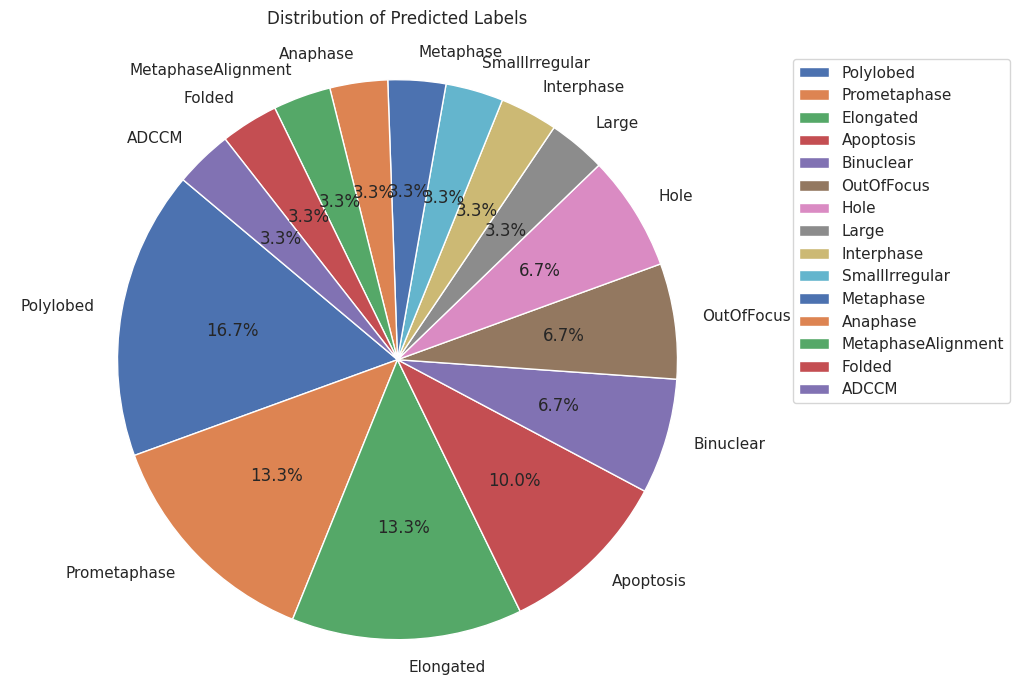

In [24]:
label_counts = proba_df["predicted_state"].value_counts()

# Plotting with Seaborn
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Predicted Labels", pad=20, fontweight="bold")
plt.axis("equal")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [26]:
type(model)

keras.src.engine.sequential.Sequential

In [30]:
TF_Model = NewType("TF_Model", Model)

In [52]:
predicted_states: DataFrame = (
    proba_df["predicted_state"]
    .to_frame()
    .reset_index()
    .rename(columns={"index": "cell"})
)

counts = proba_df["predicted_state"].value_counts()
proportion = (
    round((counts / counts.sum()) * 100)
    .to_frame()
    .reset_index()
    .rename(columns={"count": "percentage"})
)

proportion

,predicted_state,percentage
0,Polylobed,17.0
1,Prometaphase,13.0
2,Elongated,13.0
3,Apoptosis,10.0
4,Binuclear,7.0
5,OutOfFocus,7.0
6,Hole,7.0
7,Large,3.0
8,Interphase,3.0
9,SmallIrregular,3.0


In [53]:
predicted_states

,cell,predicted_state
0,0,Prometaphase
1,1,Elongated
2,2,Polylobed
3,3,Binuclear
4,4,Large
5,5,OutOfFocus
6,6,Interphase
7,7,Prometaphase
8,8,Polylobed
9,9,Apoptosis
